<a href="https://colab.research.google.com/github/Angelo-CPE/-CASIDSID-SURLA-CPE-019---Final-Exam/blob/main/(CASIDSID_SURLA)_Midterm_Examination_Weather_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MIDTERM EXAMINATION | Multi-class Weather Dataset**

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies 2 in CpE
2nd Semester | AY 2023-2024
<hr> | <hr>
<u>**MIDTERM EXAMINATION** | **Multi-class Weather Dataset**
**Name** | Casidsid, Amiel Judd & Surla, Angelo Joshua
**Section** | CpE32S1
**Date Performed**: | 04/02/24
**Date Submitted**: | 04/09/24
**Instructor**: | Engr. Ryan Francisco

<hr>

![DATASET DESCRIPTION](https://drive.google.com/uc?export=view&id=1xTPbd0xgz2g2gZEsewcXQYt5o5f5AU4a)

Mounting the Google Drive to have all the files in one repository for easier management.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**DOWNLOAD:** [Google Drive Folder used](https://drive.google.com/drive/folders/11GtJF38TmyNd7STQxiQkbZMMUyklLt9H?usp=sharing)

**Note:** Make sure to explain each line of code on how they are used and to only use codes that will contribute to the overall output of the model. This means that we should avoid using unnecessary commands.

## **Exploratory Data Analysis**

**Note:** If necessary use **Interquartile Range Method** and look for outlier values during the EDA process in order to smoothen the MLP process. To look for outliers use the **<dataset>.describe()** and for the graph of outliers use the **Box and Whiskers Plot**.

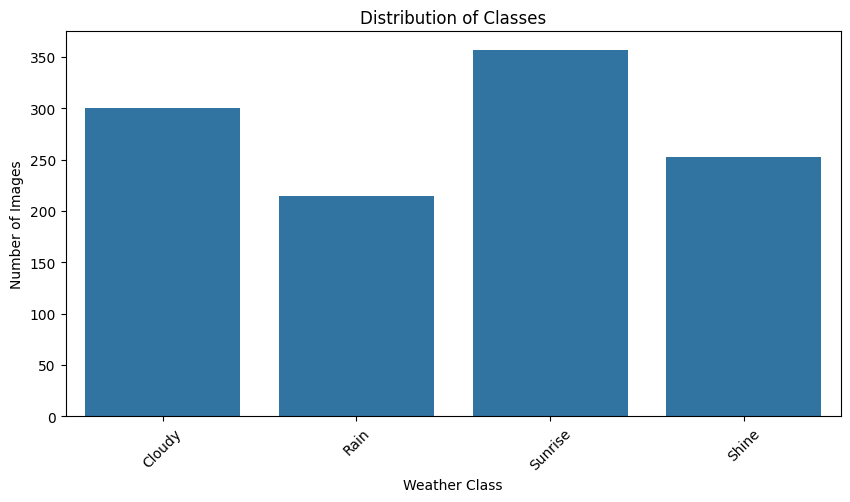

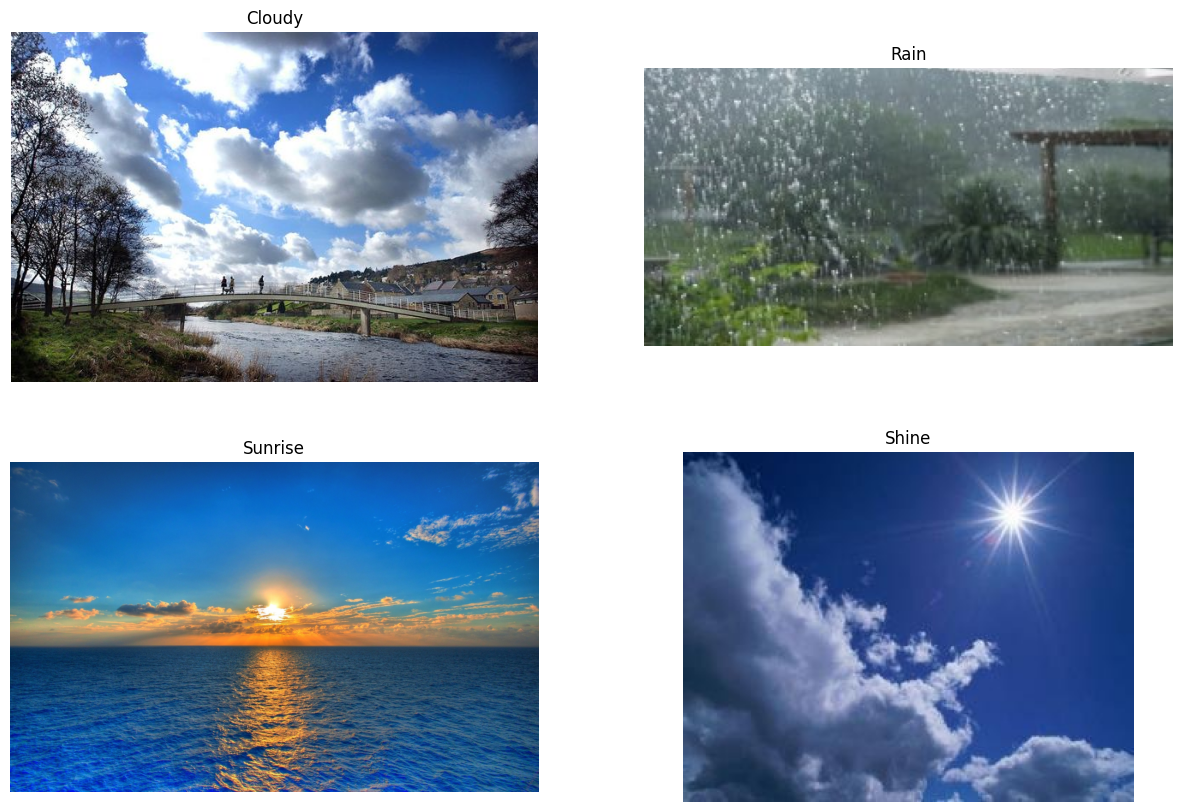

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

data_dir = '/content/drive/MyDrive/Colab Notebooks/CPE 019 MIDTERMS EXAM/Multi-class Weather Dataset'

classes = os.listdir(data_dir)

class_counts = {class_name: len(os.listdir(os.path.join(data_dir, class_name))) for class_name in classes}

plt.figure(figsize=(10, 5))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title('Distribution of Classes')
plt.xlabel('Weather Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(15, 10))
for i, class_name in enumerate(classes, start=1):
    class_dir = os.path.join(data_dir, class_name)
    image_names = os.listdir(class_dir)
    sample_image_path = os.path.join(class_dir, image_names[0])
    sample_image = plt.imread(sample_image_path)
    plt.subplot(2, 2, i)
    plt.imshow(sample_image)
    plt.title(class_name)
    plt.axis('off')
plt.show()


Outliers found in class Cloudy:
[('cloudy137.jpg', 49.44691104447776), ('cloudy126.jpg', 188.3074905451226), ('cloudy131.jpg', 0.6084464), ('cloudy288.jpg', 190.2818047113611), ('cloudy290.jpg', 189.96583227522825), ('cloudy71.jpg', 51.60767060367454), ('cloudy51.jpg', 48.614509944406855), ('cloudy64.jpg', 45.3448861882716), ('cloudy62.jpg', 35.309339805825246), ('cloudy66.jpg', 43.73746550772627)]


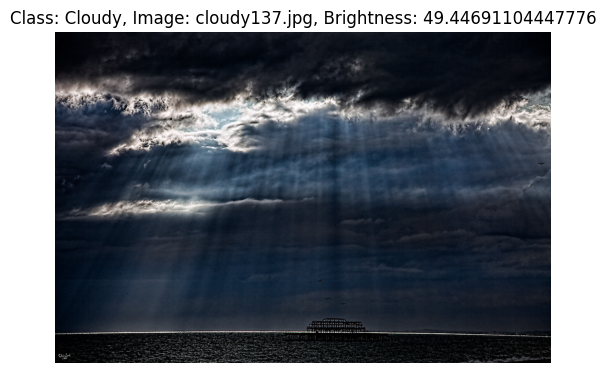

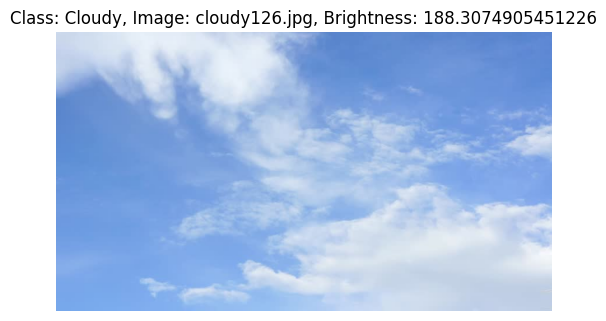

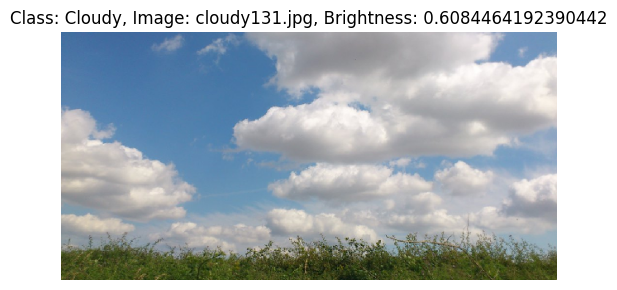

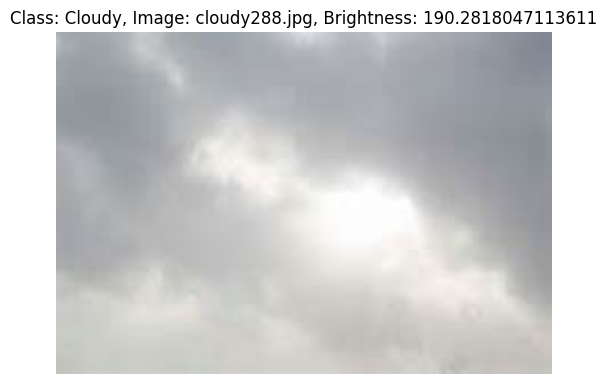

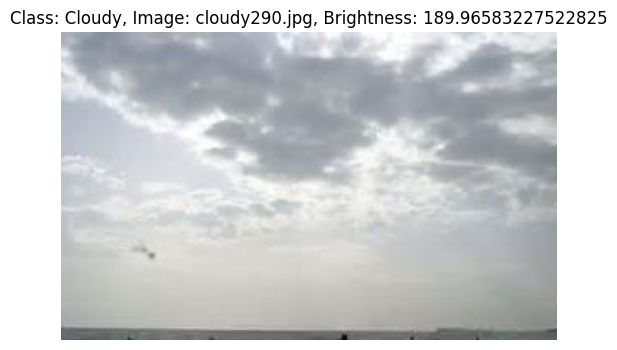

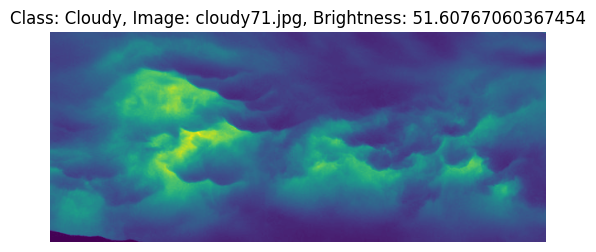

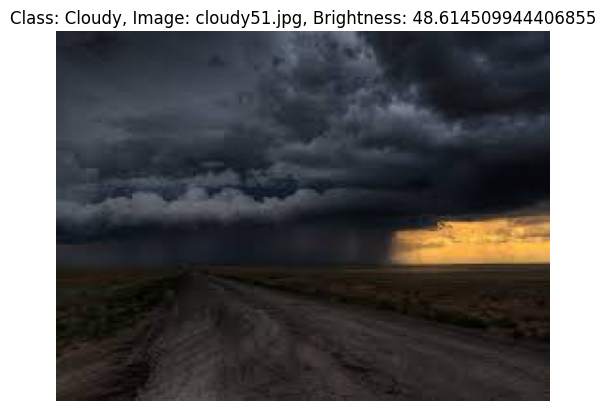

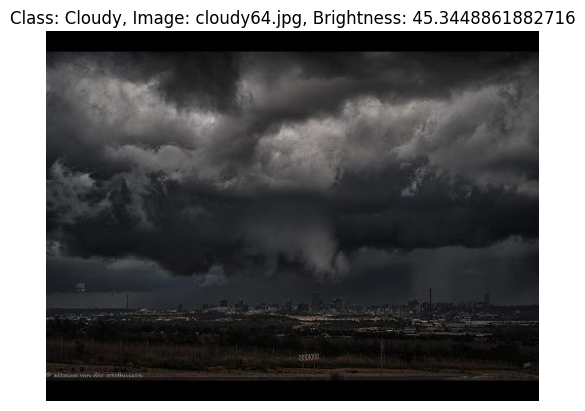

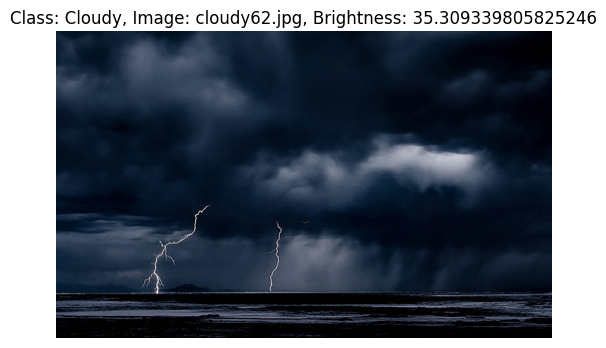

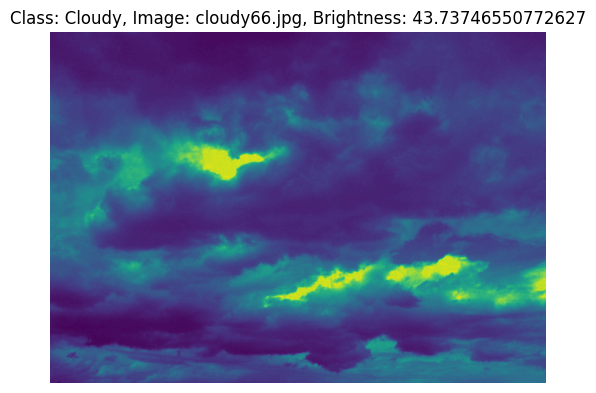

Outliers found in class Rain:
[('rain136.jpg', 0.5936689), ('rain195.jpg', 0.48156923), ('rain26.jpg', 0.5936689), ('rain31.jpg', 31.1380640323422)]


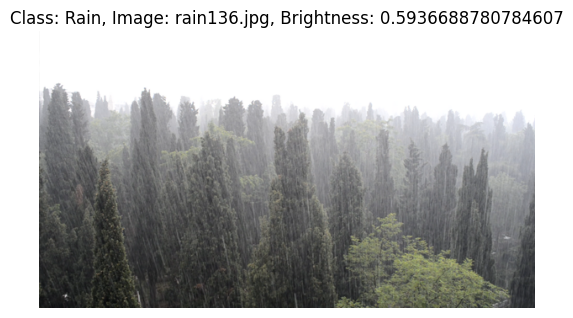

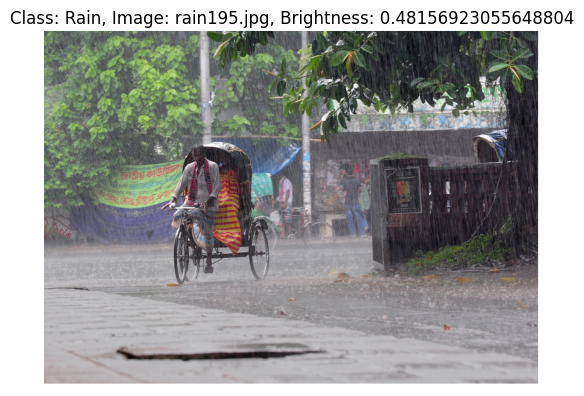

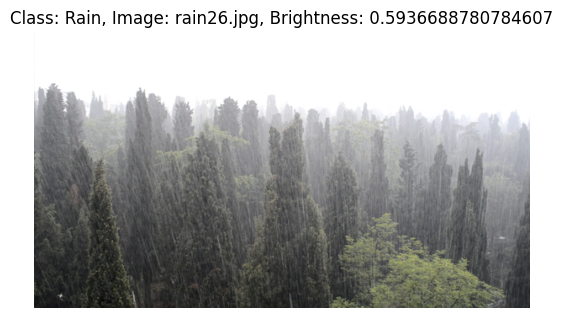

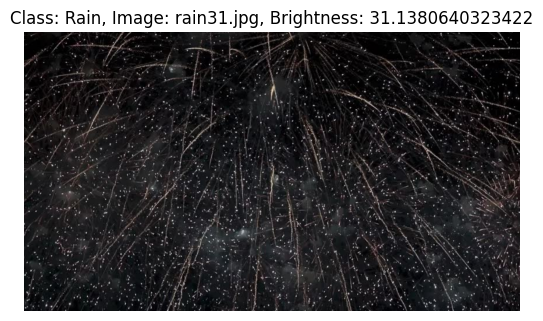

Outliers found in class Sunrise:
[('sunrise184.jpg', 0.6012721), ('sunrise86.jpg', 160.21960877484756)]


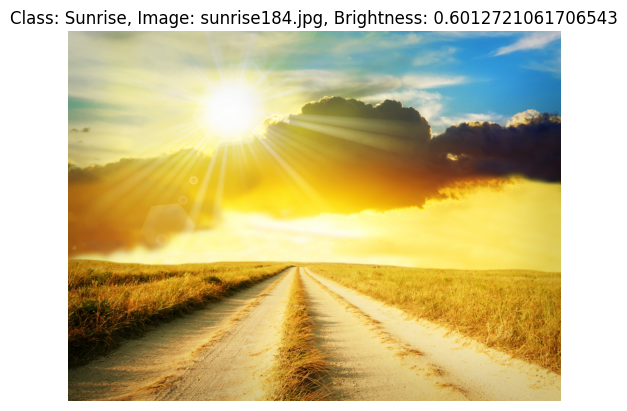

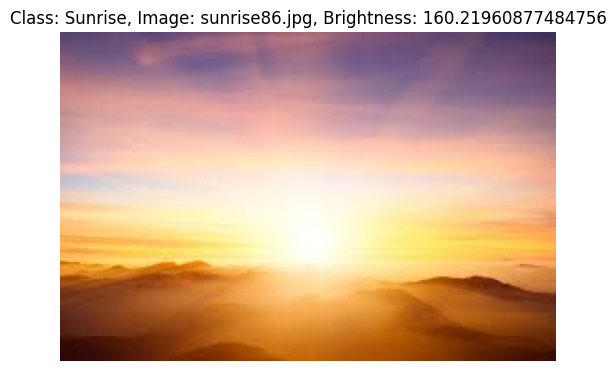

Outliers found in class Shine:
[('shine127.jpg', 0.6583392), ('shine212.jpg', 83.26115702479339), ('shine54.jpg', 85.07833911368016), ('shine252.jpg', 84.49104273504274)]


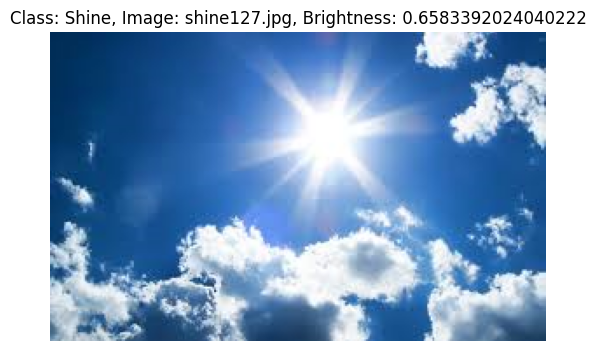

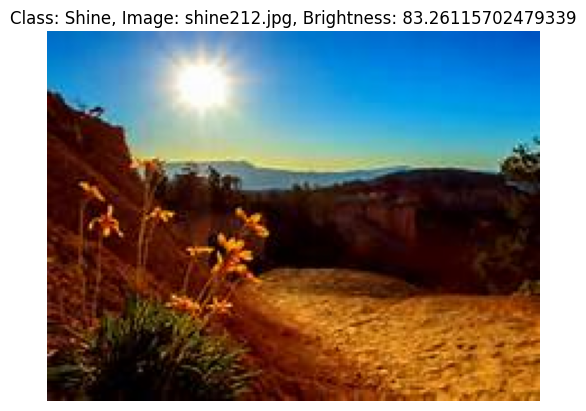

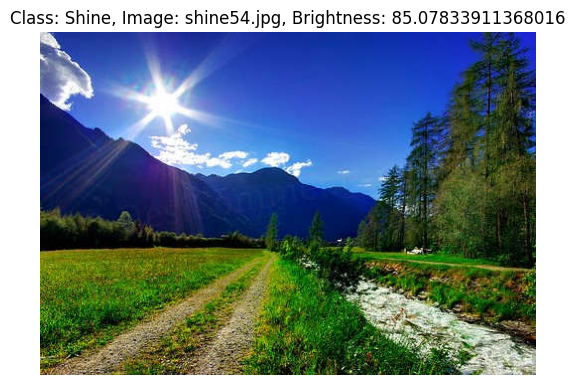

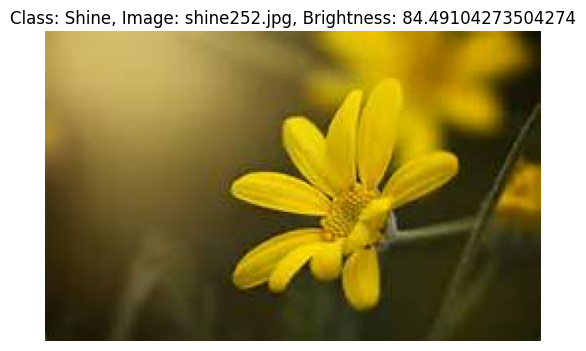

In [ ]:
# IQR
def calculate_iqr(class_dir):
    # Load images and convert them to arrays
    images = [plt.imread(os.path.join(class_dir, image_name)) for image_name in os.listdir(class_dir)]
    # Calculate the mean brightness for each image
    brightness = [np.mean(image) for image in images]
    # Calculate IQR
    q1 = np.percentile(brightness, 25)
    q3 = np.percentile(brightness, 75)
    iqr = q3 - q1
    return iqr, q1, q3

def detect_outliers(class_dir, iqr, q1, q3, threshold=1.5):
    images = [plt.imread(os.path.join(class_dir, image_name)) for image_name in os.listdir(class_dir)]
    brightness = [np.mean(image) for image in images]
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    outliers = [(image_name, brightness_value) for image_name, brightness_value in zip(os.listdir(class_dir), brightness)
                if brightness_value < lower_bound or brightness_value > upper_bound]
    return outliers

def visualize_outliers(class_dir, outliers):
    for image_name, brightness_value in outliers:
        image_path = os.path.join(class_dir, image_name)
        image = plt.imread(image_path)
        plt.imshow(image)
        plt.title(f'Class: {class_name}, Image: {image_name}, Brightness: {brightness_value}')
        plt.axis('off')
        plt.show()

for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    iqr, q1, q3 = calculate_iqr(class_dir)
    outliers = detect_outliers(class_dir, iqr, q1, q3)
    if len(outliers) > 0:
        print(f'Outliers found in class {class_name}:')
        print(outliers)
        visualize_outliers(class_dir, outliers)
    else:
        print(f'No outliers found in class {class_name}.')

         count        mean        std       min         25%         50%  \
Class                                                                     
Cloudy   300.0  117.161004  29.402956  0.608446  102.598381  116.904695   
Rain     215.0  117.378929  32.649482  0.481569   98.268049  118.810226   
Shine    253.0  147.734034  27.510019  0.658339  133.483979  147.127916   
Sunrise  357.0   90.635755  25.244366  0.601272   73.710384   90.847175   

                75%         max  
Class                            
Cloudy   136.334993  190.281805  
Rain     139.948499  197.388448  
Shine    165.743741  213.390487  
Sunrise  107.807613  160.219609  


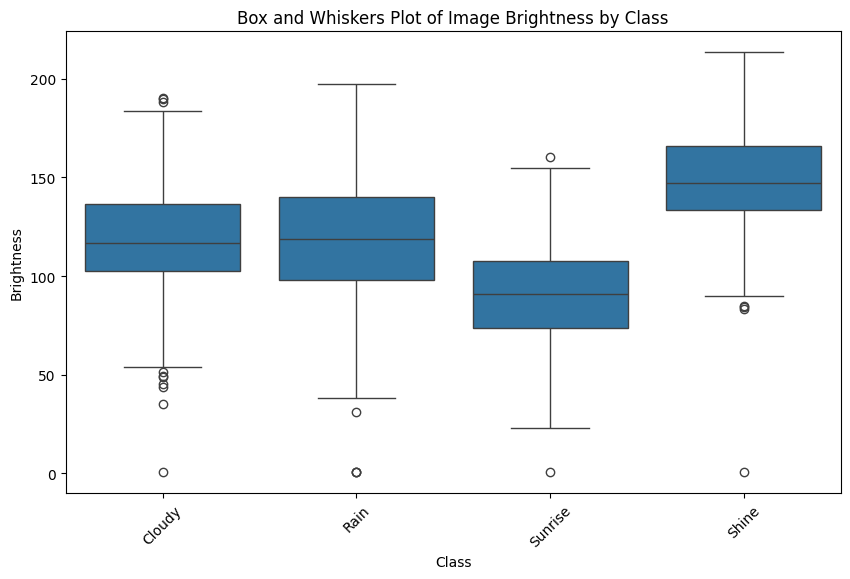

In [ ]:
def calculate_brightness(image_path):
    image = plt.imread(image_path)
    return np.mean(image)

brightness_data = []
for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        brightness = calculate_brightness(image_path)
        brightness_data.append({'Class': class_name, 'Brightness': brightness})

# DataFrame from brightness data
import pandas as pd
df = pd.DataFrame(brightness_data)

# .describe() for statistics and identifying outliers
brightness_stats = df.groupby('Class')['Brightness'].describe()
print(brightness_stats)

# Box and Whiskers Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Brightness', data=df)
plt.title('Box and Whiskers Plot of Image Brightness by Class')
plt.xlabel('Class')
plt.ylabel('Brightness')
plt.xticks(rotation=45)
plt.show()

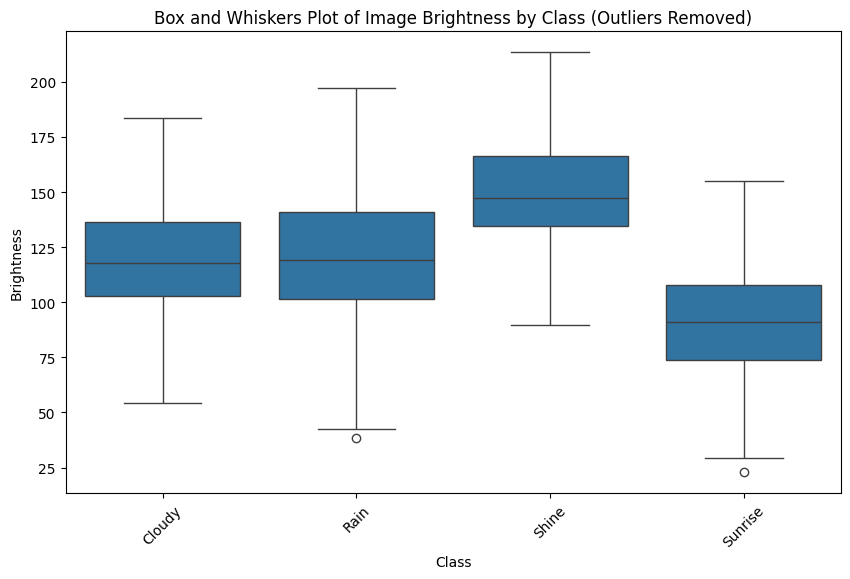

In [ ]:
# Function to remove outliers based on IQR method
def remove_outliers(df):
    Q1 = df['Brightness'].quantile(0.25)
    Q3 = df['Brightness'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df['Brightness'] >= lower_bound) & (df['Brightness'] <= upper_bound)]

# Remove outliers
df_cleaned = df.groupby('Class').apply(remove_outliers).reset_index(drop=True)

# Box and Whiskers Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Brightness', data=df_cleaned)
plt.title('Box and Whiskers Plot of Image Brightness by Class (Outliers Removed)')
plt.xlabel('Class')
plt.ylabel('Brightness')
plt.xticks(rotation=45)
plt.show()

## **Multilayer Perceptron Classification Model**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
image_height = 150
image_width = 150
num_classes = 4
batch_size = 32
epochs = 20

In [ ]:
def calculate_brightness(image_path):
    image = plt.imread(image_path)
    return np.mean(image)

In [ ]:
def load_data_with_brightness(data_dir, target_size=(150, 150)):
    images = []
    labels = []
    brightness_data = []
    for label, class_name in enumerate(os.listdir(data_dir)):
        class_dir = os.path.join(data_dir, class_name)
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            image = load_img(image_path, target_size=target_size)
            image_array = img_to_array(image) / 255.0
            images.append(image_array)
            labels.append(label)
            brightness = calculate_brightness(image_path)
            brightness_data.append({'Class': class_name, 'Brightness': brightness})
    return np.array(images), np.array(labels), brightness_data

In [ ]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/CPE 019 MIDTERMS EXAM/Multi-class Weather Dataset'
images, labels, brightness_data = load_data_with_brightness(data_dir)

In [ ]:
import pandas as pd
df = pd.DataFrame(brightness_data)

In [ ]:
def remove_outliers(df):
    Q1 = df['Brightness'].quantile(0.25)
    Q3 = df['Brightness'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df['Brightness'] >= lower_bound) & (df['Brightness'] <= upper_bound)]

df_cleaned = df.groupby('Class').apply(remove_outliers).reset_index(drop=True)

# Split data into features (X) and labels (y)
X = images
y = labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define MLP model
model = models.Sequential([
    layers.Flatten(input_shape=(image_height, image_width, 3)),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

## **Evaluation**

In [ ]:
# Train model
history = model.fit(X_train, y_train, epochs=epochs, validation_split=0.2, batch_size=batch_size)

# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/20
23/23 [==============================] - 5s 183ms/step - loss: 15.8804 - accuracy: 0.4764 - val_loss: 4.3446 - val_accuracy: 0.6000
Epoch 2/20
23/23 [==============================] - 4s 183ms/step - loss: 2.5265 - accuracy: 0.6597 - val_loss: 2.1627 - val_accuracy: 0.7000
Epoch 3/20
23/23 [==============================] - 7s 292ms/step - loss: 2.0762 - accuracy: 0.6750 - val_loss: 2.6003 - val_accuracy: 0.6833
Epoch 4/20
23/23 [==============================] - 5s 201ms/step - loss: 2.3934 - accuracy: 0.6667 - val_loss: 2.5110 - val_accuracy: 0.7167
Epoch 5/20
23/23 [==============================] - 4s 180ms/step - loss: 1.5634 - accuracy: 0.7306 - val_loss: 1.6552 - val_accuracy: 0.8111
Epoch 6/20
23/23 [==============================] - 6s 277ms/step - loss: 1.0639 - accuracy: 0.7806 - val_loss: 1.7365 - val_accuracy: 0.7611
Epoch 7/20
23/23 [==============================] - 4s 190ms/step - loss: 0.9475 - accuracy: 0.7833 - val_loss: 1.9844 - val_accuracy: 0.7167
Epoch

## **Accuracy Improvement**

In [ ]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/CPE 019 MIDTERMS EXAM/Multi-class Weather Dataset'
images, labels, brightness_data = load_data_with_brightness(data_dir)

import pandas as pd
df = pd.DataFrame(brightness_data)

def remove_outliers(df):
    Q1 = df['Brightness'].quantile(0.25)
    Q3 = df['Brightness'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df['Brightness'] >= lower_bound) & (df['Brightness'] <= upper_bound)]

df_cleaned = df.groupby('Class').apply(remove_outliers).reset_index(drop=True)

X = images
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modified MLP Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=epochs, validation_split=0.2, batch_size=batch_size)

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/20
23/23 [==============================] - 45s 2s/step - loss: 1.4853 - accuracy: 0.5708 - val_loss: 0.6631 - val_accuracy: 0.7000
Epoch 2/20
23/23 [==============================] - 43s 2s/step - loss: 0.6169 - accuracy: 0.7750 - val_loss: 0.6428 - val_accuracy: 0.8667
Epoch 3/20
23/23 [==============================] - 39s 2s/step - loss: 0.4327 - accuracy: 0.8583 - val_loss: 0.5438 - val_accuracy: 0.8833
Epoch 4/20
23/23 [==============================] - 40s 2s/step - loss: 0.3840 - accuracy: 0.8583 - val_loss: 0.7040 - val_accuracy: 0.8667
Epoch 5/20
23/23 [==============================] - 43s 2s/step - loss: 0.4042 - accuracy: 0.8486 - val_loss: 0.6723 - val_accuracy: 0.8333
Epoch 6/20
23/23 [==============================] - 40s 2s/step - loss: 0.3441 - accuracy: 0.8750 - val_loss: 0.5624 - val_accuracy: 0.8778
Epoch 7/20
23/23 [==============================] - 41s 2s/step - loss: 0.2899 - accuracy: 0.9042 - val_loss: 0.6898 - val_accuracy: 0.8556
Epoch 8/20
23/23 [==

## **Saving the Best Model**

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/CPE 019 MIDTERMS EXAM/CS_Midterms_Weather_Prediction_Model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## **Model Testing**

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image as keras_image

loaded_model = load_model('/content/drive/MyDrive/Colab Notebooks/CPE 019 MIDTERMS EXAM/CS_Midterms_Weather_Prediction_Model.h5')

# Loading an Image
test_image_path = '/content/drive/MyDrive/Colab Notebooks/CPE 019 MIDTERMS EXAM/test 2.jpg'
test_image = keras_image.load_img(test_image_path, target_size=(image_height, image_width))
test_image = keras_image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Preprocess
test_image /= 255.0  # Normalize pixel values

predictions = loaded_model.predict(test_image)
predicted_class = np.argmax(predictions[0])
class_labels = {0: 'shine', 1: 'rain', 2: 'sunrise', 3: 'cloudy'}

print(f'The predicted weather class is: {class_labels[predicted_class]}')

1/1 [==============================] - 0s 114ms/step
The predicted weather class is: sunrise
